## Project :- Analyzing Insurance premium charges prediction using Linear Regression Algorithm with Python.

## Problem Statement :- Accurate prediction of insurance charges is critical for ensuring fair pricing and maintaining profitability in the insurance industry. This project addresses the challenge of building a predictive model to estimate insurance charges for individuals based on their demographic, health, and behavioral attributes. Using a dataset containing variables such as age, sex, BMI, smoker status, annual salary, and medical history (e.g., past consultations, hospitalizations, and claim amounts), exploratory data analysis (EDA) was performed to identify trends and patterns. A machine learning or deep learning model was then developed to predict insurance charges, enabling the company to implement data-driven pricing strategies while optimizing risk assessment.

## 

## Importing Essential Libraries:

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading the Data-set file:

In [2]:
insure= pd.read_csv('new_insurance_data.csv')

In [3]:
insure

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


## Explolatory Data Analysis Starts:

### Checking Shape, Renaming and exploring various Information of the Data-set -

In [4]:
insure.shape

(1338, 13)

In [5]:
# checking for basic info of the data set:
insure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [6]:
insure.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [7]:
# filling the null values in the data-set :
insure.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [8]:
col= insure.columns

In [9]:
for col_name in col:
    if insure[col_name].dtype== 'object':
        insure[col_name]=insure[col_name].fillna(insure[col_name].mode())
    else:
        insure[col_name]=insure[col_name].fillna(insure[col_name].mean())
        

In [10]:
insure.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

In [11]:
insure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1338 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1338 non-null   float64
 3   children                         1338 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1338 non-null   float64
 6   past_consultations               1338 non-null   float64
 7   num_of_steps                     1338 non-null   float64
 8   Hospital_expenditure             1338 non-null   float64
 9   NUmber_of_past_hospitalizations  1338 non-null   float64
 10  Anual_Salary                     1338 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

## Data Visualization:

In [12]:
insure

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


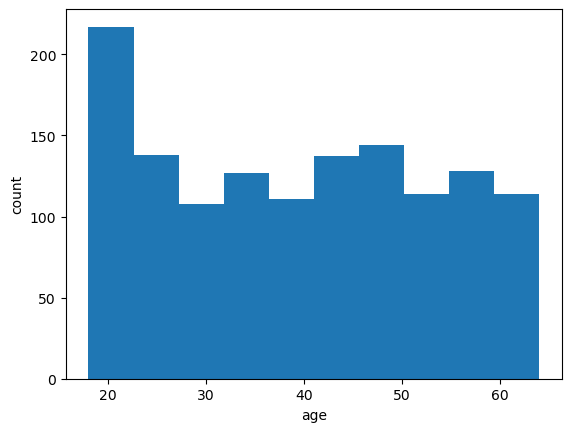

In [13]:
plt.hist(insure['age'])
plt.xlabel('age')
plt.ylabel('count')
plt.show()

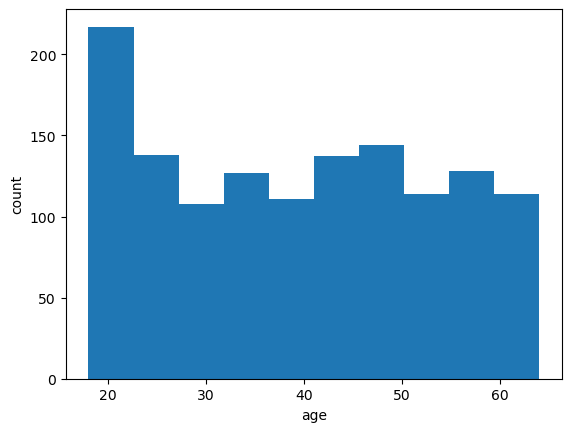

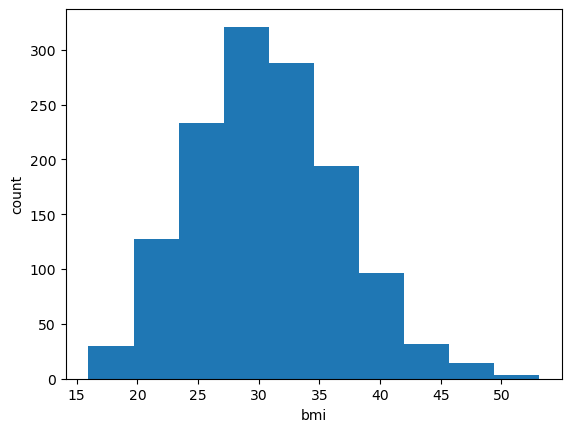

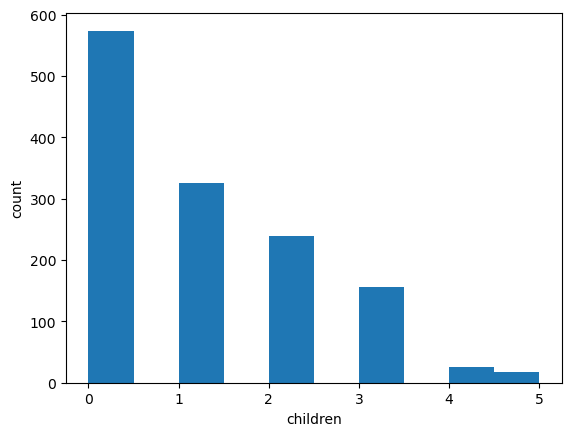

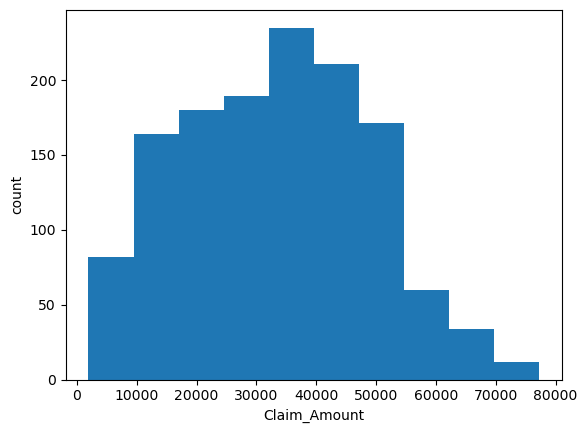

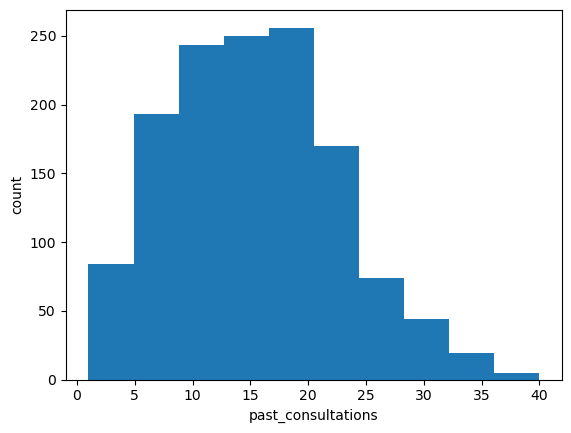

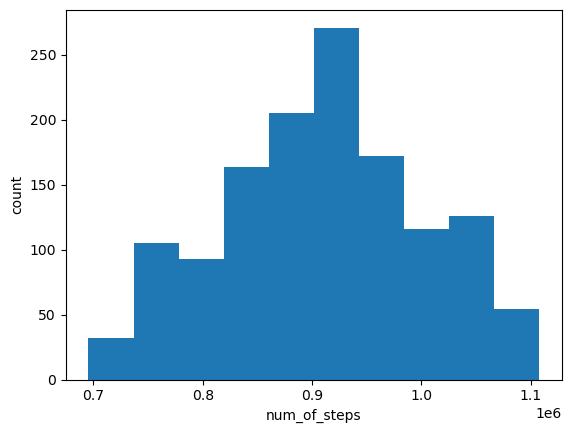

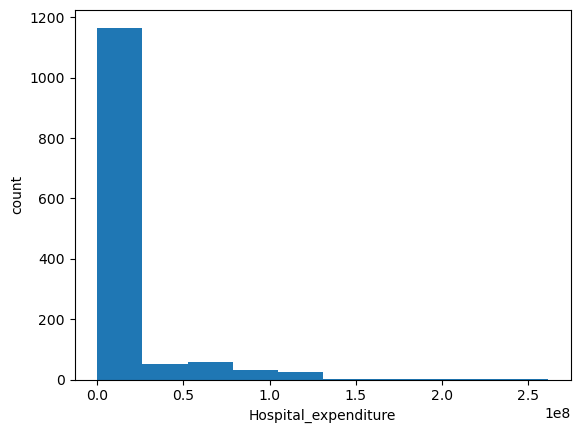

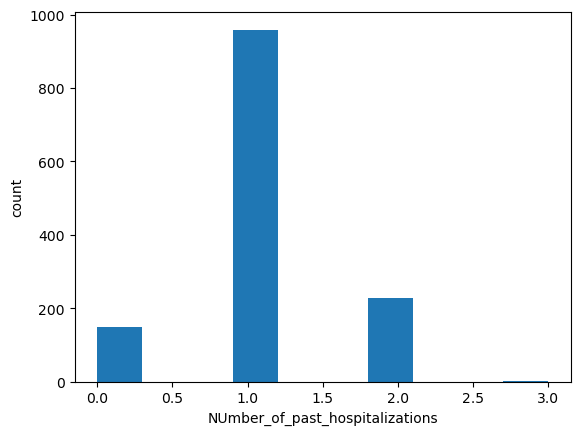

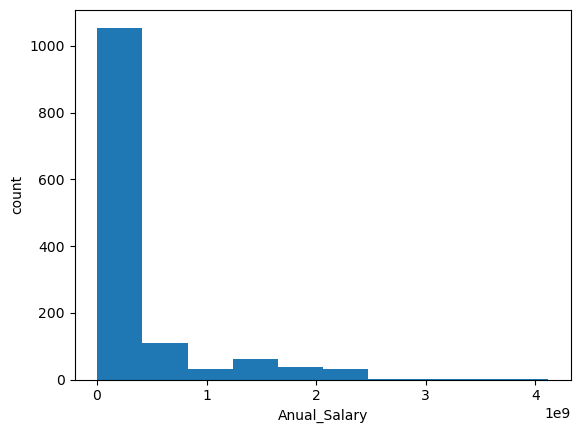

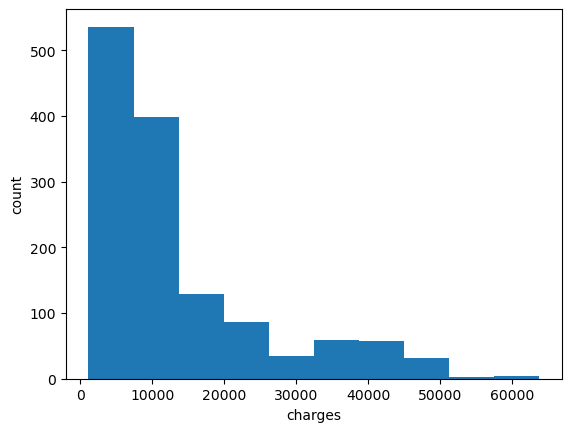

In [14]:
# getting vizualization for every column using loop:
for col_name in col:
    if insure[col_name].dtype=='int64' or insure[col_name].dtype=='float64':
        plt.hist(insure[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [15]:
insure.describe()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1.338000e+03,1.338000e+03,1338.000000,1.338000e+03,1338.000000
mean,39.310008,30.665112,1.090773,33361.327180,15.216216,9.100047e+05,1.584179e+07,1.060629,3.696849e+08,13270.422265
std,13.987500,6.094840,1.199606,15535.307255,7.450948,9.178297e+04,2.665309e+07,0.533184,5.656109e+08,12110.011237
min,18.000000,15.960000,0.000000,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,1121.873900
25%,27.000000,26.315000,0.000000,20947.645198,9.000000,8.474898e+05,4.084941e+06,1.000000,7.755085e+07,4740.287150
50%,39.310008,30.400000,1.000000,33611.286065,15.000000,9.140155e+05,7.500985e+06,1.000000,1.422756e+08,9382.033000
75%,51.000000,34.656250,2.000000,44978.873188,20.000000,9.715100e+05,1.090187e+07,1.000000,3.298713e+08,16639.912515
max,64.000000,53.130000,5.000000,77277.988480,40.000000,1.107872e+06,2.616317e+08,3.000000,4.117197e+09,63770.428010


## Outlier diagonistics:

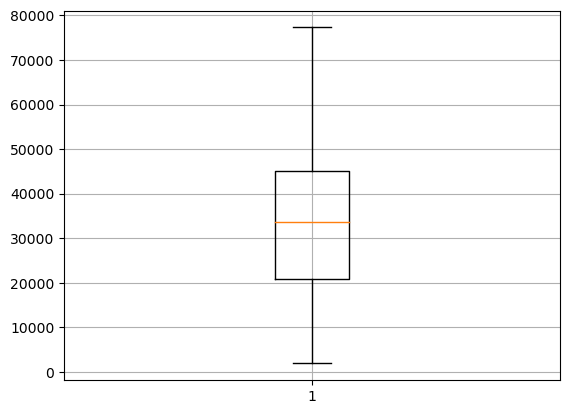

In [16]:
plt.boxplot(insure['Claim_Amount'])
plt.grid()
plt.show()

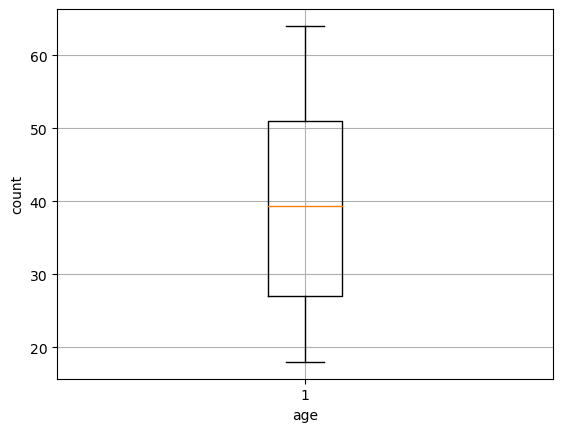

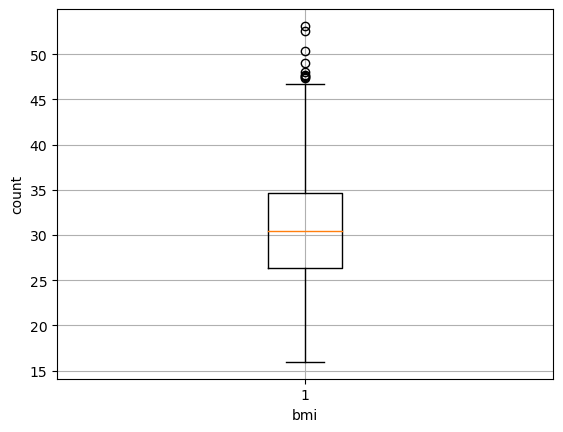

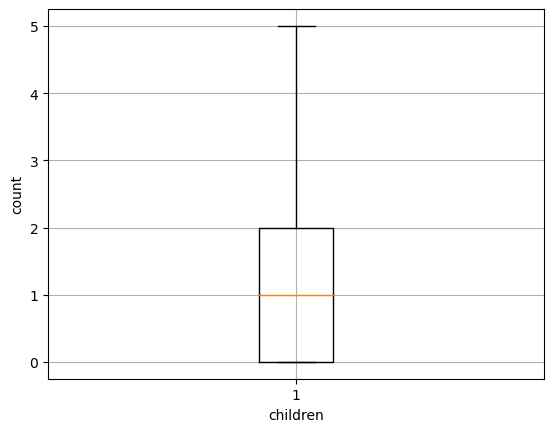

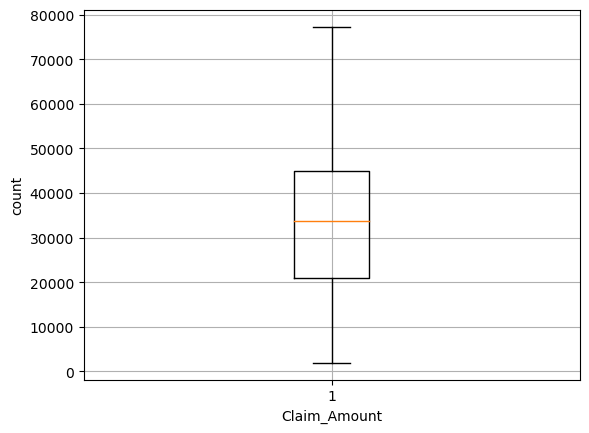

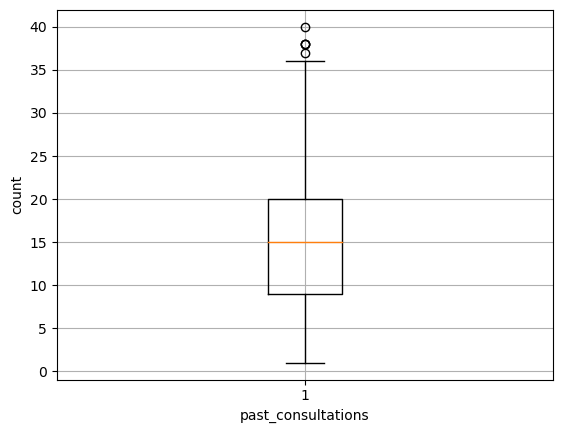

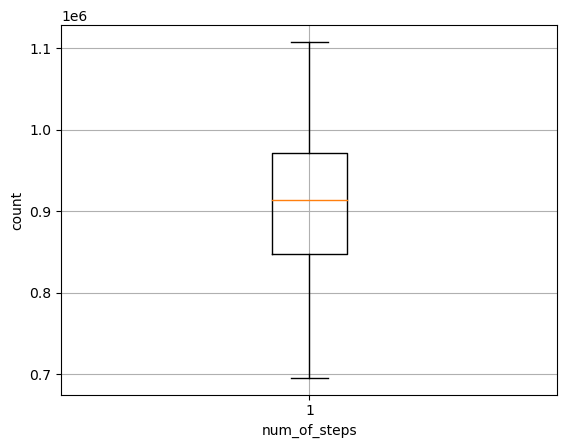

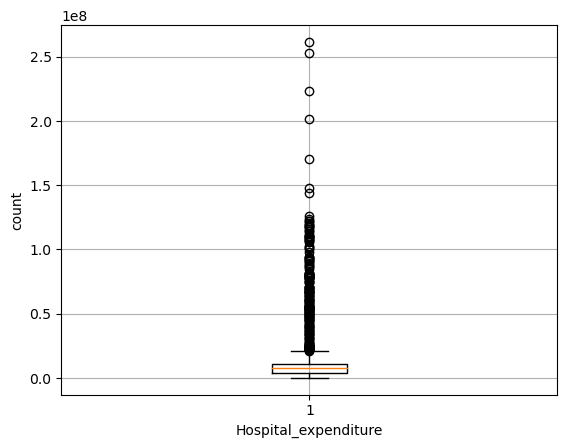

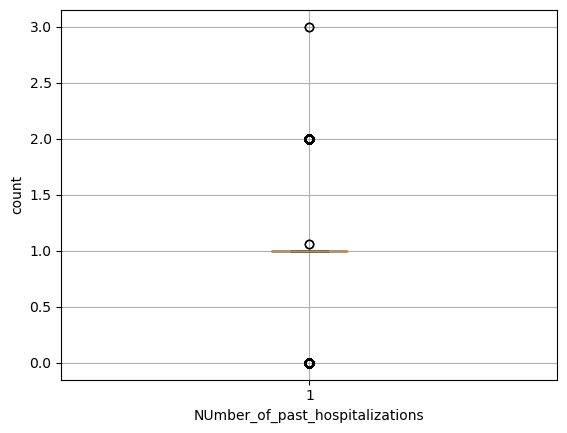

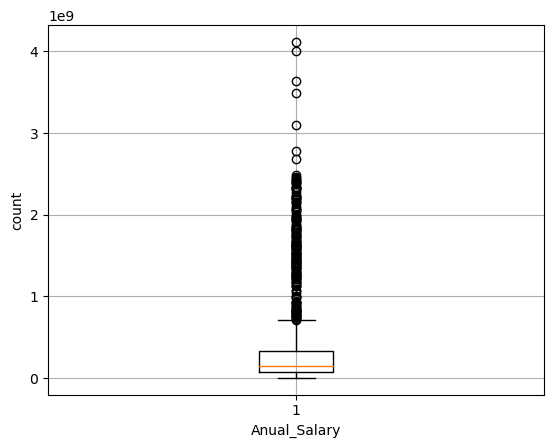

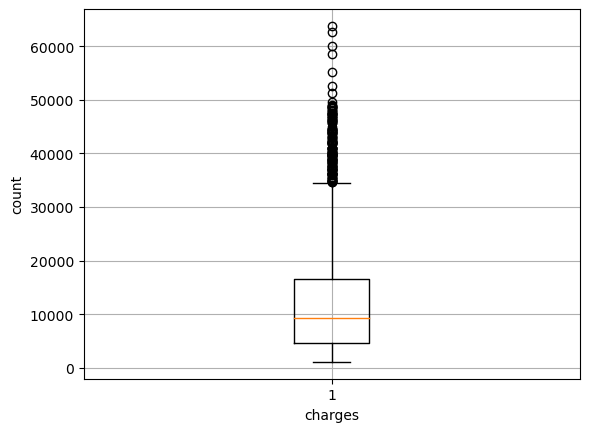

In [17]:
# plotting box plots for outlier detection for every column using loops:
for col_name in col:
    if insure[col_name].dtype=='int64' or insure[col_name].dtype=='float64':
        plt.boxplot(insure[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.grid()
        plt.show()

## Conclusion from Outlier Diagonistics: We can see that some columns definitely have lots of outliers in them. feeding them inside our regression model, will train our model badly and test accuracy will be bad and low.


##    

In [19]:
# getting rid of the outliers as much as possible:
Q1 = insure.bmi.quantile(0.25)
Q3 = insure.bmi.quantile(0.75)
IQR = Q3 - Q1
insure = insure[(insure.bmi >= Q1 - 1.5*IQR) & (insure.bmi <= Q3 + 1.5*IQR)]

Q1 = insure.past_consultations.quantile(0.25)
Q3 = insure.past_consultations.quantile(0.75)
IQR = Q3 - Q1
insure = insure[(insure.past_consultations >= Q1 - 1.5*IQR) & (insure.past_consultations <= Q3 + 1.5*IQR)]

Q1 = insure.Hospital_expenditure.quantile(0.25)
Q3 = insure.Hospital_expenditure.quantile(0.75)
IQR = Q3 - Q1
insure = insure[(insure.Hospital_expenditure >= Q1 - 1.5*IQR) & (insure.Hospital_expenditure <= Q3 + 1.5*IQR)]

Q1 = insure.Anual_Salary.quantile(0.25)
Q3 = insure.Anual_Salary.quantile(0.75)
IQR = Q3 - Q1
insure = insure[(insure.Anual_Salary >= Q1 - 1.5*IQR) & (insure.Anual_Salary <= Q3 + 1.5*IQR)]


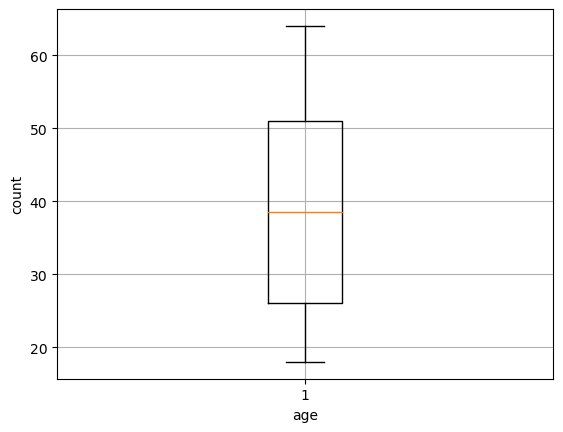

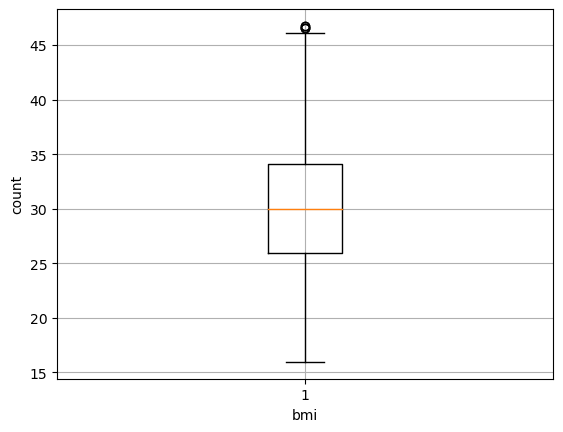

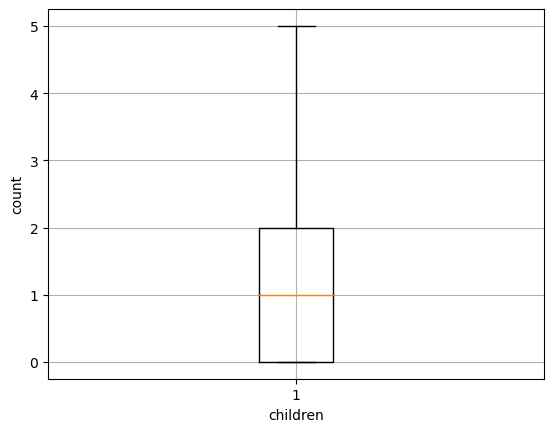

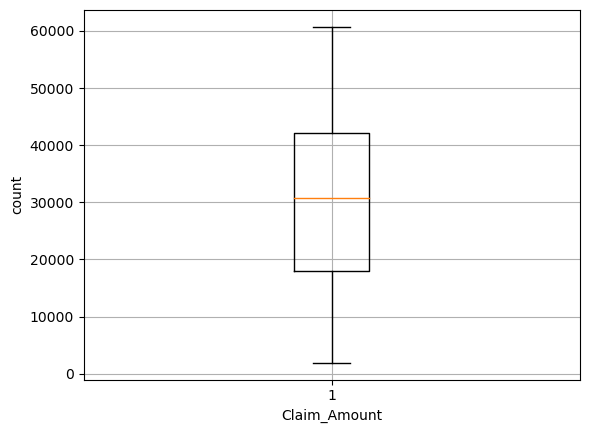

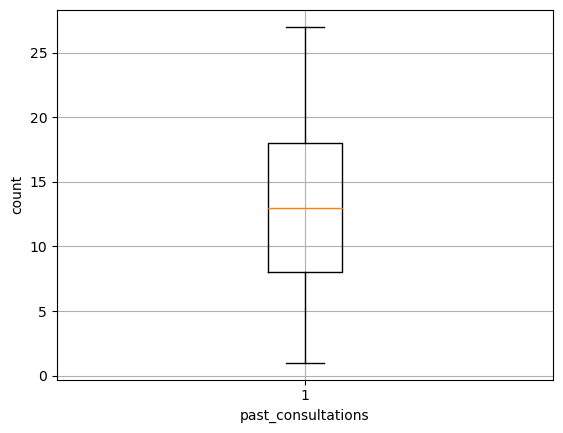

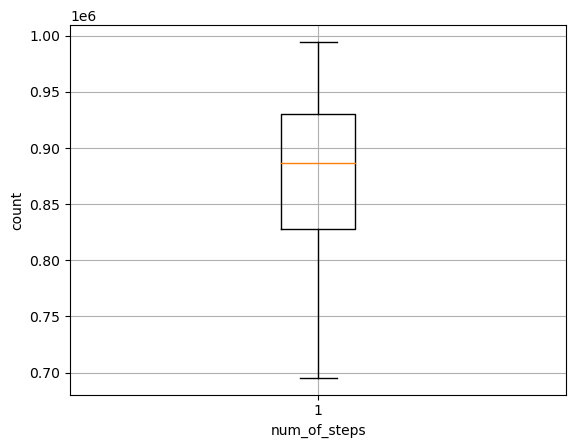

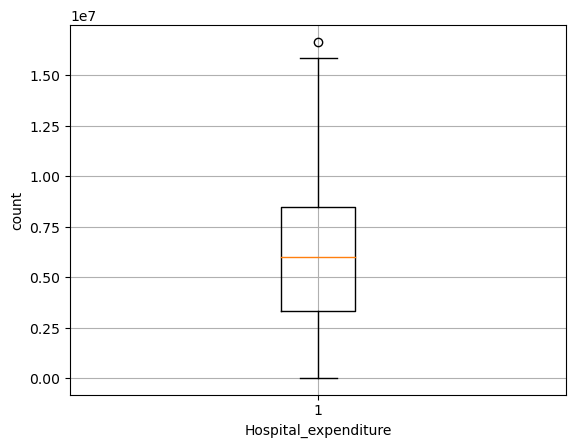

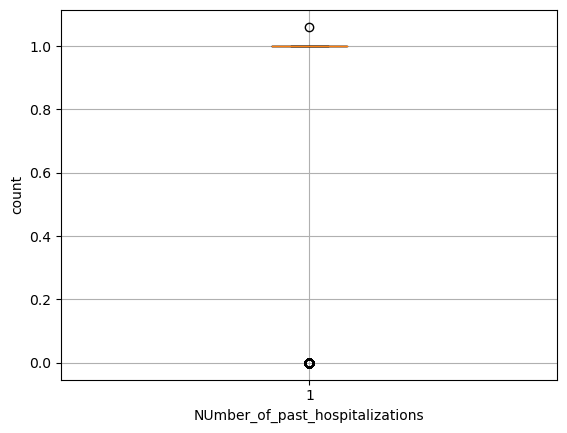

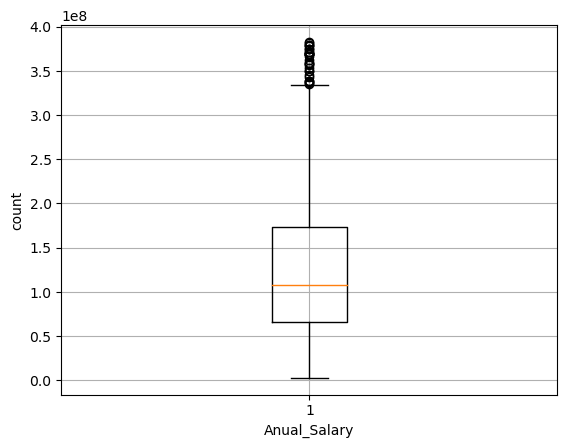

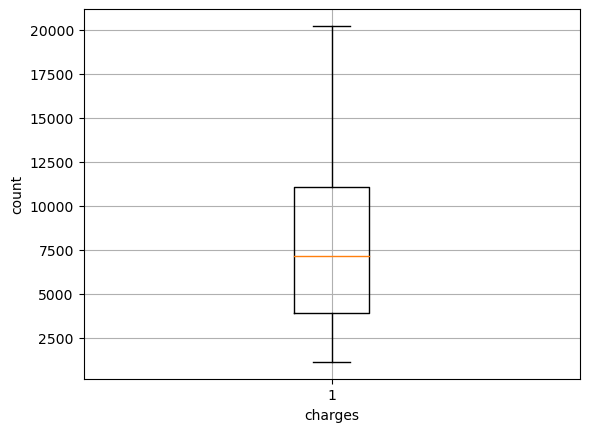

In [20]:
for col_name in col:
    if insure[col_name].dtype=='int64' or insure[col_name].dtype=='float64':
        plt.boxplot(insure[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.grid()
        plt.show()

In [21]:
insure.shape

(1030, 13)

 ## 2nd Conclusion from Outlier Diagonistics: Now due to outlier elemination already 308 data points we don't have, so we wouldn't further eleminate data points,because then we'll have less sample data points for prediction.

##    

## Further Exploratory Data Analysis:

In [23]:
# checking for correlations among the variables in  data-set:
insure.corr()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
age,1.000000,0.155957,0.045371,0.117750,0.172063,0.749468,0.160555,0.519538,0.490802,0.676071
bmi,0.155957,1.000000,0.006477,0.008343,0.023543,0.040324,0.013992,0.016121,0.004105,0.010248
children,0.045371,0.006477,1.000000,0.041716,0.045472,0.228830,-0.007494,0.316622,0.064840,0.138470
Claim_Amount,0.117750,0.008343,0.041716,1.000000,0.071569,0.185434,0.054111,0.109748,0.157826,0.192601
past_consultations,0.172063,0.023543,0.045472,0.071569,1.000000,0.259401,0.088466,0.135498,0.265710,0.278131
num_of_steps,0.749468,0.040324,0.228830,0.185434,0.259401,1.000000,0.299554,0.714983,0.767247,0.936946
Hospital_expenditure,0.160555,0.013992,-0.007494,0.054111,0.088466,0.299554,1.000000,0.129334,0.366809,0.358378
NUmber_of_past_hospitalizations,0.519538,0.016121,0.316622,0.109748,0.135498,0.714983,0.129334,1.000000,0.359422,0.538116
Anual_Salary,0.490802,0.004105,0.064840,0.157826,0.265710,0.767247,0.366809,0.359422,1.000000,0.892308
charges,0.676071,0.010248,0.138470,0.192601,0.278131,0.936946,0.358378,0.538116,0.892308,1.000000


In [24]:
insure

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,29.0,female,27.940,1.0,yes,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,southeast,19107.77960
1048,31.0,male,25.900,3.0,yes,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,southwest,19199.94400
1050,31.0,male,29.810,0.0,yes,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08,southeast,19350.36890
1062,43.0,female,20.045,2.0,yes,21596.43846,10.0,994419.0,1.083030e+07,1.0,3.696849e+08,northeast,19798.05455


## Modelling:

In [25]:
# calling learning models:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [26]:
# calling vif(variance inflation factor):
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
# checking for VIF:
col_list = []
for col in insure.columns:
    if ((insure[col].dtype != 'object') & (col != 'charges') ):
        col_list.append(col)

X = insure[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
print(vif_data)

                           feature        VIF
0                              age  15.452095
1                              bmi  26.330788
2                         children   2.029618
3                     Claim_Amount   5.678660
4               past_consultations   6.258017
5                     num_of_steps  61.574692
6             Hospital_expenditure   5.204376
7  NUmber_of_past_hospitalizations  12.052060
8                     Anual_Salary   5.481823


In [28]:
# as we can see the number of steps has the max vif among the regressors of the model.


In [29]:
insure= insure.drop(['num_of_steps'], axis=1)

In [30]:
insure.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [31]:
insure.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [32]:
# Again checking for vif on the remaining regressors:
col_list = []
for col in insure.columns:
    if ((insure[col].dtype != 'object') & (col != 'charges') ):
        col_list.append(col)

X = insure[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
print(vif_data)

                           feature        VIF
0                              age  14.484893
1                              bmi  12.261123
2                         children   2.017441
3                     Claim_Amount   5.243640
4               past_consultations   5.842169
5             Hospital_expenditure   4.929952
6  NUmber_of_past_hospitalizations  10.687768
7                     Anual_Salary   5.380679


In [33]:
# Other vif not so high and they seem like they are important affecting factors to how much we can charge from a customer for his insurance as well, so we'll keep the remaining variables.

In [34]:
# Seperating target column and regressor columns in my insure data-set:
x=insure.loc[:,['children','Claim_Amount','past_consultations','Hospital_expenditure','age','bmi','NUmber_of_past_hospitalizations','Anual_Salary']]
y=insure.iloc[:,-1]  #This stores target column ie charges

## The train-test split:

In [36]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=50)

In [37]:
# Checking shape of train and test data-set:
x_train.shape

(824, 8)

In [38]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(824, 8)
(206, 8)
(824,)
(206,)


In [39]:
# setting up the blank model:
l_model= LinearRegression()

In [40]:
# fitting the training data to the linear regression model for building the model for future predictions on new data:
l_model.fit(x_train,y_train)

LinearRegression()

In [41]:
predictions=l_model.predict(x_test)

In [42]:
predictions

array([ 5485.3677779 ,  9989.10381037, 10988.05310898, 13403.21574154,
        5148.98266059,  1238.49642572,  8019.9754433 ,   -67.36389398,
        4914.37673261,  4545.72861419,  7574.00549517, 14739.2189152 ,
        5698.74776908,  5167.80660677, 10365.35513593, 12704.50478931,
        8861.8761832 ,  8085.54073073,  5784.71870956,  9976.12595188,
        5004.07829953, 11540.01605671,  6593.23080625, 13904.22923249,
        7662.10891966,  2207.17335562,  7510.56774666,  4787.12790674,
        8717.92539976, 11452.3581437 , 10897.44246811, 10498.34452172,
       10553.27064672,  4418.91136994, 16712.36247371, 16651.48899979,
        6634.74978995,  8130.24134525,  2117.33377035,  4761.54891343,
        5168.78826825, 12533.53542885,  6953.21254155,  9515.09505248,
       11387.11087413,  6908.36660981,  7413.4615089 , 13661.25407382,
        5915.38278752, 16527.32428072,  7401.4862842 , 13823.42695193,
       13052.04896334,  5967.31444437,  2622.70948554,  3630.80208026,
      

## Model Accuracy:

In [43]:
# Creating an empty data-frame with predicted value and real value column names , for comparison of the 2 datas.
error_predictions= pd.DataFrame(columns={'actual-data','predicted-data'})


In [44]:
error_predictions

,predicted-data,actual-data


In [45]:
# entering the actual data values:
error_predictions['actual-data']=y_test

In [46]:
error_predictions

,predicted-data,actual-data
502,NaN,7045.49900
614,NaN,8551.34700
688,NaN,9634.53800
942,NaN,13887.20400
281,NaN,4185.09790
...,...,...
100,NaN,2104.11340
719,NaN,10115.00885
801,NaN,11394.06555
486,NaN,6753.03800


In [47]:
# entering the predicted values:
error_predictions['predicted_data']=predictions

In [48]:
error_predictions.head(50)

,predicted-data,actual-data,predicted_data
502,NaN,7045.49900,5485.367778
614,NaN,8551.34700,9989.103810
688,NaN,9634.53800,10988.053109
942,NaN,13887.20400,13403.215742
281,NaN,4185.09790,5148.982661
105,NaN,2136.88225,1238.496426
537,NaN,7419.47790,8019.975443
11,NaN,1242.26000,-67.363894
12,NaN,1242.81600,4914.376733
236,NaN,3561.88890,4545.728614


In [49]:
# creating an error in the model column also:
error_predictions['Error']=error_predictions['actual-data']-error_predictions['predicted_data']

In [50]:
error_predictions.head(60)

,predicted-data,actual-data,predicted_data,Error
502,NaN,7045.49900,5485.367778,1560.131222
614,NaN,8551.34700,9989.103810,-1437.756810
688,NaN,9634.53800,10988.053109,-1353.515109
942,NaN,13887.20400,13403.215742,483.988258
281,NaN,4185.09790,5148.982661,-963.884761
105,NaN,2136.88225,1238.496426,898.385824
537,NaN,7419.47790,8019.975443,-600.497543
11,NaN,1242.26000,-67.363894,1309.623894
12,NaN,1242.81600,4914.376733,-3671.560733
236,NaN,3561.88890,4545.728614,-983.839714


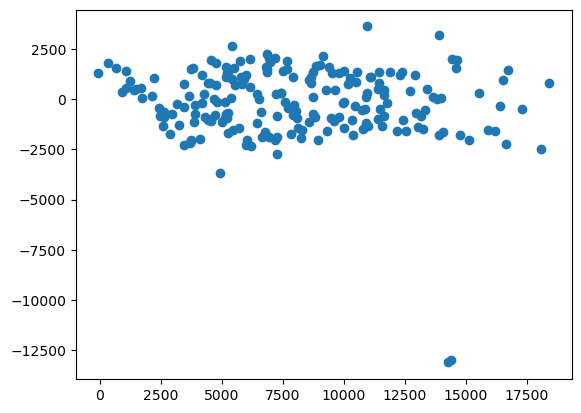

In [55]:
plt.scatter(error_predictions['predicted_data'],error_predictions['Error']) # More or less following the assumption of homoscedasticity.

(array([ 2.,  0.,  0.,  0.,  0.,  1., 38., 76., 79., 10.]),
 array([-13115.8306819 , -11442.58064131,  -9769.33060072,  -8096.08056013,
         -6422.83051954,  -4749.58047895,  -3076.33043836,  -1403.08039777,
           270.16964282,   1943.41968341,   3616.669724  ]),
 <BarContainer object of 10 artists>)

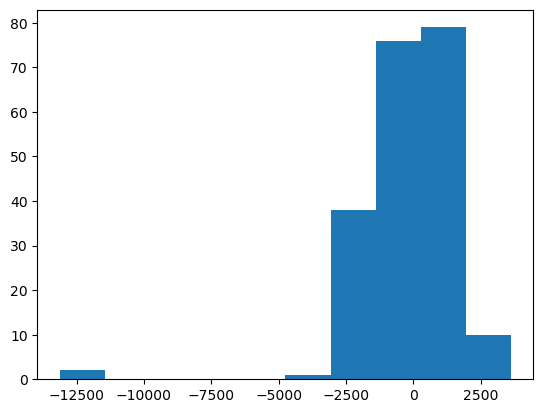

In [56]:
plt.hist(error_predictions['Error']) # Also following the assumption of expected value of residuals should be 0 assumption also. 

In [51]:
# calculating  root mean squared error of my model:
mse=0
for i in error_predictions['Error']:
    mse=mse+(i**2)
mse2=mse/len(error_predictions['Error'])
print(mse2**(1/2))
    

1843.1230558359987


In [52]:
# calculating R^2 on my model:
from sklearn.metrics import *


In [53]:
R_2_score= r2_score(y_test,predictions)

In [54]:
R_2_score # Our R^2 score is pretty high and rmse is also fine so overall our model is good. # Since model more or less following all assumptions of clrm, thus good prediction accuracy.

0.8093365573493645